# Title 

In [283]:
#imports
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import r2_score as r2 

import os

## <u><b> Part 1 </b></u>

### Adjusting the data for the program

#### Loading the data

In [284]:
rnd = np.random.randint(1000)
cars = []
for dirname, _, filenames in os.walk(r'data/cars'):
    for f in filenames:
        temp = pd.read_csv(r'data/cars/'+f)
        temp["manufacturer"] = f[:-4]
        #some datasets have "tax(£)" and some have "tax"
        if "tax(£)" in temp.columns:
            temp.rename({"tax(£)":"tax"}, inplace=True)
        cars.append(temp)
df = pd.concat(cars)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,ford
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,ford
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,ford
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,ford
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,ford


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
 9   manufacturer  17965 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.4+ MB


#### Looking for missing values

In [286]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
manufacturer    0
dtype: int64

Seems like we dont have any missing values

#### Handling object values

In [287]:
df.describe(include="O")

,model,transmission,fuelType,manufacturer
count,17965,17965,17965,17965
unique,23,3,5,1
top,Fiesta,Manual,Petrol,ford
freq,6557,15517,12178,17965


In [288]:
cat = ["transmission","fuelType","manufacturer"]
nume = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
remove = ["model"]


In [289]:
full_data = pd.get_dummies(df,columns=(remove+cat))
data = pd.get_dummies(df,columns=cat).drop(columns=remove)
full_data.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,manufacturer_ford
0,2017,12000,15944,150,57.7,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,2018,14000,9083,150,57.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,2017,13000,12456,150,57.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,2019,17500,10460,145,40.3,1.5,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,2019,16500,1482,145,48.7,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [290]:
data.head()

,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,manufacturer_ford
0,2017,12000,15944,150,57.7,1.0,1,0,0,0,0,0,0,1,1
1,2018,14000,9083,150,57.7,1.0,0,1,0,0,0,0,0,1,1
2,2017,13000,12456,150,57.7,1.0,0,1,0,0,0,0,0,1,1
3,2019,17500,10460,145,40.3,1.5,0,1,0,0,0,0,0,1,1
4,2019,16500,1482,145,48.7,1.0,1,0,0,0,0,0,0,1,1


## <u><b> Part 2 </b></u>

### Cleaning and scaling the data

#### Visualization of our data

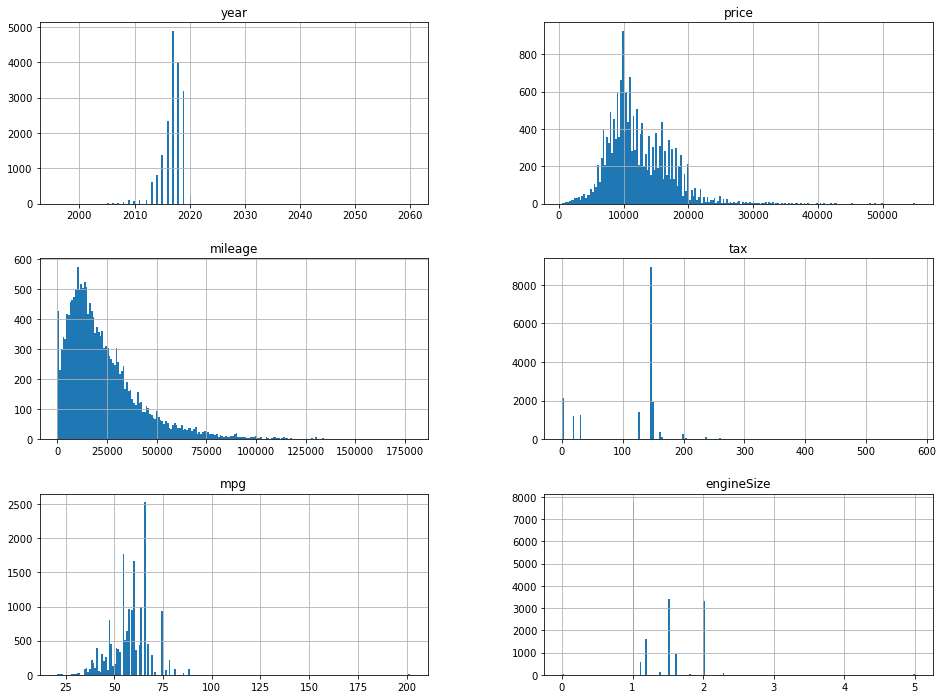

In [291]:
df.hist(bins=200,figsize=(16,12))
plt.show()

#### Visualization of the correlations between the columns

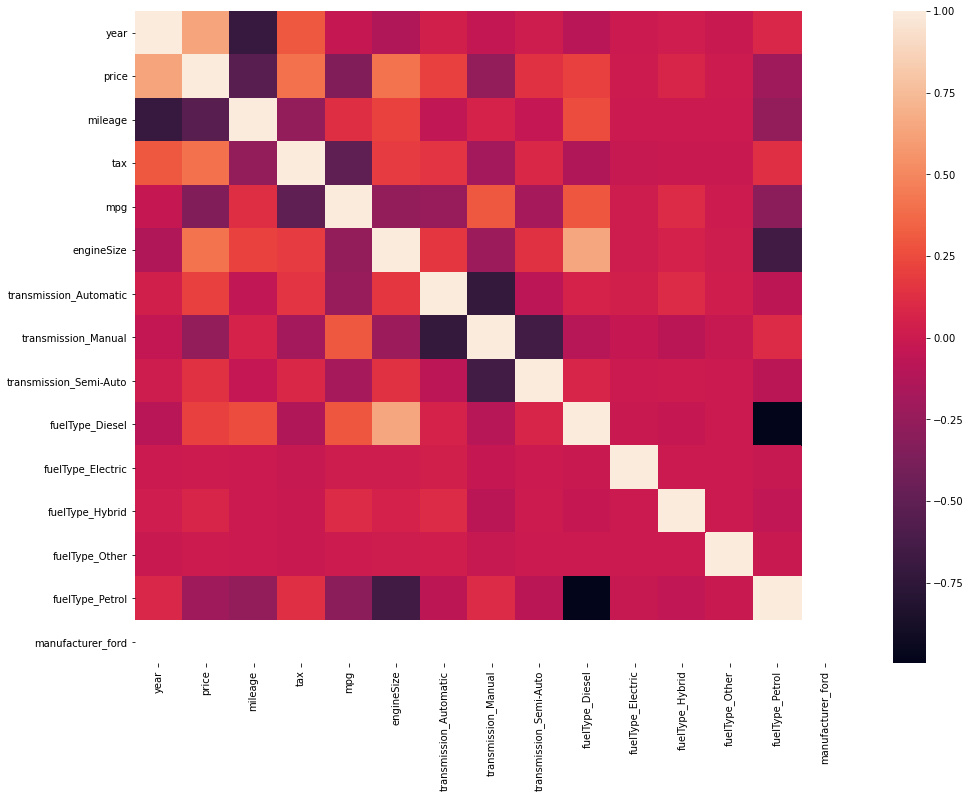

In [292]:
matrix = data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(matrix)
plt.show()

Since there is no perfect correlation between any 2 labels, we can keep all of them for now.

In [293]:
matrix

,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,manufacturer_ford
year,1.000000,0.635994,-0.707899,0.298457,-0.022969,-0.137358,0.036484,-0.037877,0.014010,-0.088772,-0.004460,0.024015,-0.006792,0.087083,NaN
price,0.635994,1.000000,-0.530727,0.406821,-0.346427,0.411156,0.208176,-0.258745,0.141269,0.199920,0.007695,0.072888,0.002392,-0.205359,NaN
mileage,-0.707899,-0.530727,1.000000,-0.260550,0.120077,0.215001,-0.050356,0.059778,-0.030129,0.257597,-0.003468,-0.001370,-0.001492,-0.257099,NaN
tax,0.298457,0.406821,-0.260550,1.000000,-0.503013,0.184311,0.154938,-0.181702,0.089497,-0.128978,-0.019286,-0.007145,-0.013637,0.130019,NaN
mpg,-0.022969,-0.346427,0.120077,-0.503013,1.000000,-0.260527,-0.235048,0.302292,-0.174107,0.293550,0.009788,0.106737,0.006921,-0.301536,NaN
engineSize,-0.137358,0.411156,0.215001,0.184311,-0.260527,1.000000,0.163879,-0.224328,0.140909,0.642133,0.015843,0.054416,0.011202,-0.646011,NaN
transmission_Automatic,0.036484,0.208176,-0.050356,0.154938,-0.235048,0.163879,1.000000,-0.720810,-0.072657,0.057904,0.036856,0.104259,0.026060,-0.066889,NaN
transmission_Manual,-0.037877,-0.258745,0.059778,-0.181702,0.302292,-0.224328,-0.720810,1.000000,-0.638929,-0.098320,-0.026566,-0.083519,-0.018784,0.105358,NaN
transmission_Semi-Auto,0.014010,0.141269,-0.030129,0.089497,-0.174107,0.140909,-0.072657,-0.638929,1.000000,0.077209,-0.002678,0.004465,-0.001893,-0.077365,NaN
fuelType_Diesel,-0.088772,0.199920,0.257597,-0.128978,0.293550,0.642133,0.057904,-0.098320,0.077209,1.000000,-0.007251,-0.024061,-0.005127,-0.996815,NaN


## <u><b> Part 3 </b></u>

### Splitting data to train/test and making models

In [294]:
exp = full_data["price"]
data = full_data.drop(columns=["price"])

In [295]:
trainD, testD, trainE, testE = train_test_split(data, exp,random_state=rnd)

### Logistic Regression model
#### Base line model

In [296]:
svr_base = LinearRegression()
svr_base.fit(trainD,trainE)
pred_base = svr_base.predict(testD)

In [297]:
print("train Accuracy:",svr_base.score(trainD,trainE))
print("root of mean squared error:",np.sqrt(MSE(testE,pred_base)))
print("R2 score:",r2(testE,pred_base))

train Accuracy: 0.10035653107762887
root of mean squared error: 4436.465378369506
R2 score: 0.09895739664303871


#### Scaling our data
Since we have outliers, we will use standard scaler

In [298]:
scaler = StandardScaler()
trainD = scaler.fit_transform(trainD)
testD = scaler.transform(testD)

#### Hyperparameter tuning

train Accuracy: 0.9295047179657822


test Accuracy: -4.010515745721921e+20


root of mean squared error: 127156356827734.22


R2 score: -4.010515745721921e+20


-4.010515745721921e+20

array([ 3.96935714e+14,  4.34356632e+14, -1.87620118e+16, ...,
        3.89920594e+14,  4.34356632e+14,  3.96935714e+14])

6929    17990
8046     9712
8323    15499
805     15495
840     22988
        ...  
3759     9990
5087    31990
5698    19490
4174    19000
5699    21995
Name: price, Length: 2667, dtype: int64